In [1]:
import numpy as np
import pandas as pd
import neurokit as nk
import matplotlib.pyplot as plt
import bioread

In [6]:
cd C:\Users\asus\Desktop\signal data\test2

C:\Users\asus\Desktop\signal data\test2


In [7]:
data = bioread.read_file('3Registros_test2.acq')

In [8]:
type(data)

bioread.biopac.Datafile

In [9]:
data

AcqKnowledge file (rev 133): 4 channels, 2000.0 samples/sec

<IPython.core.display.Javascript object>


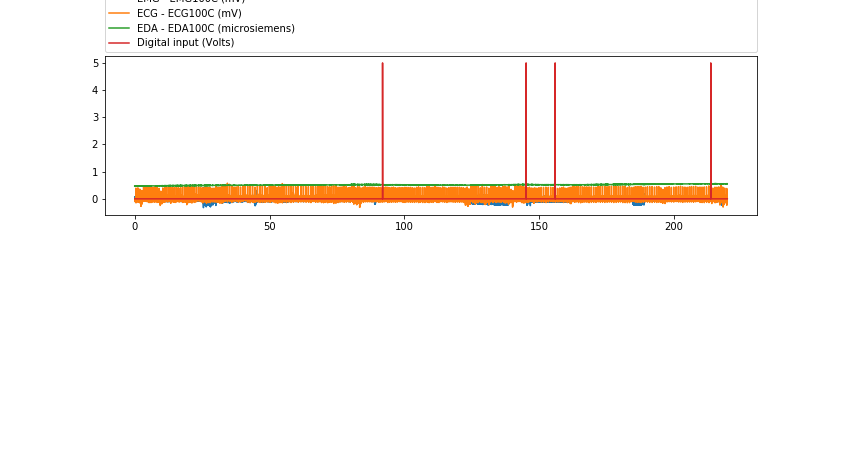

In [12]:
%matplotlib notebook

plt.subplot(211)

for chan in data.channels:
    plt.plot(chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

In [13]:
#selecting emg channel
emg = data.channels[0]
emg

Channel EMG - EMG100C: 219710 samples, 1000.0 samples/sec, loaded: True

In [17]:
#creating a time array
time = np.array([i/1000 for i in range(0, len(emg.data), 1)])
time.shape

(219710,)

<IPython.core.display.Javascript object>


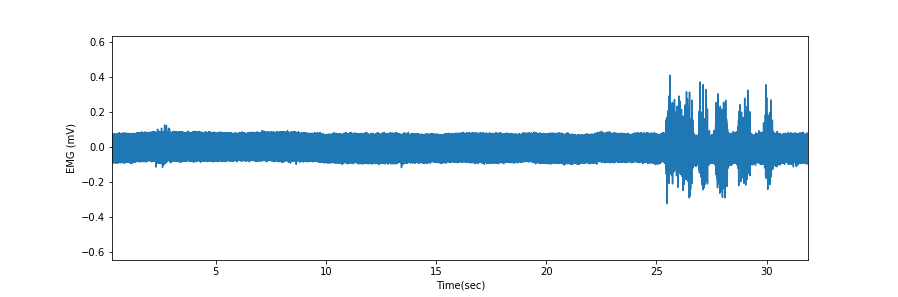

In [18]:
#plottin emg channel
%matplotlib notebook
plt.plot(time,emg.data)
plt.xlabel('Time(sec)')
plt.ylabel('EMG (mV)')
plt.show()

In [78]:
#inspecting processed emg dict
processed_emg = nk.emg_process(emg.data)
processed_emg.keys() #print dict keys

dict_keys(['df', 'EMG'])

In [69]:
df = processed_emg['df']
df.head()

,EMG_Raw,EMG_Pulse_Onsets,EMG_Filtered,EMG_Envelope,EMG_Activation
0,0.031128,NaN,0.000136,0.000023,0
1,0.024719,NaN,0.012680,0.000023,0
2,0.016479,NaN,0.024200,0.000024,0
3,-0.025330,NaN,0.002958,0.000025,0
4,-0.052795,NaN,-0.004416,0.000026,0


In [30]:
emg_onsets = processed_emg['EMG']['EMG_Pulse_Onsets']
emg_onsets

array([ 25436,  25862,  25898,  26646,  26919,  27338,  27679,  28237,
        28699,  29279,  29923,  30304,  35404,  35412,  44382,  45068,
       145467, 145485, 185137, 187916, 188092, 188593, 188635, 188713,
       188741, 188838, 188856, 188873, 188879, 188947, 188967, 188975],
      dtype=int64)

<IPython.core.display.Javascript object>


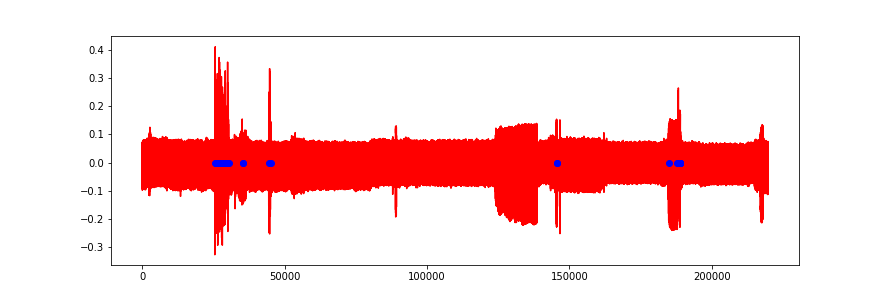

In [71]:
#`lotting emg and markers
%matplotlib notebook
plt.plot(df['EMG_Raw'],'r')
plt.plot(df['EMG_Pulse_Onsets']-1, 'bo')

<IPython.core.display.Javascript object>


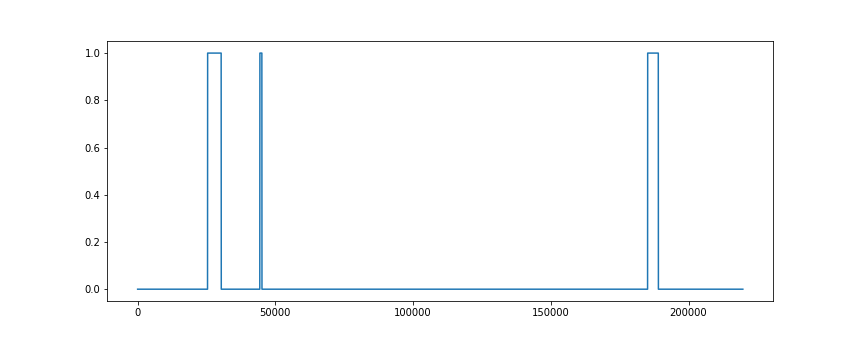

In [74]:
%matplotlib notebook
plt.plot(df['EMG_Activation'])